# Diet and Cost Minimization Calculator
>    This calculator will minimize the cost given a set of food [variables] and constraints on those variables.  

## Setup

In [91]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import pulp
from IPython.display import display, HTML

## Table of Available Foods:

In [92]:
groceries = pd.read_csv('groceries.csv')
display(groceries,)

,Items,Carbohydrates,Protein,Fat,Calories,Fiber,Serving,Cost,Cat,Description
0,Apple,14.00,0.30,0.20,53,2.4,1 apple,0.333,Integer,"Smiths Fuji Apples extra small (2-1/2"" dia)"
1,Beer,7.00,1.00,0.00,110,0.0,12oz,0.800,Integer,Budlight 30 Pack
2,Black_Beans,19.00,7.00,0.50,110,7.0,1/2cup=130g,0.206,Continuous,"Great Value Reduced Sodium Black Beans, 15.25oz"
3,Bread,14.00,3.00,1.00,70,2.0,1 slice,0.060,Integer,Great Value Wheat Bread
4,Broccoli,4.00,1.00,0.00,25,2.0,3oz=1cup,0.270,Integer,Great Value Frozen Broccoli
5,Brown_Rice,35.00,4.00,1.50,160,2.0,1/4cup=45g,0.080,Continuous,Kroger Long Grain Brown Rice
6,Cabernet,4.00,0.00,0.00,125,0.0,5oz,0.559,Integer,Franzia Cabernet Sauvignon
7,Cheese,1.00,7.00,9.00,111,0.0,1oz,0.270,Integer,Great Value Mild Shredded Cheddar
8,Chicken,0.00,19.00,8.00,150,0.0,4oz,0.770,Integer,Costco Chicken Thighs
9,Coconut_Oil,0.00,0.00,14.00,120,0.0,1tbsp,0.100,Integer,Costco Coconut Oil


                    https://www.tablesgenerator.com/html_tables#
            https://pythonhosted.org/PuLP/CaseStudies/a_blending_problem.html

>   We are going to use the above table, nutrition values, cost and Python to minimize cost given our constraints

In [93]:

items=groceries['Items'].values
carbs=groceries.set_index('Items').drop(['Protein','Fat','Calories','Serving','Fiber','Cost','Cat','Description'],axis=1).to_dict()
protein=groceries.set_index('Items').drop(['Carbohydrates','Fat','Calories','Fiber','Serving','Cost','Cat','Description'],axis=1).to_dict()
fat=groceries.set_index('Items').drop(['Carbohydrates','Protein','Calories','Fiber','Serving','Cost','Cat','Description'],axis=1).to_dict()
cal=groceries.set_index('Items').drop(['Carbohydrates','Protein','Fat','Fiber','Serving','Cost','Cat','Description'],axis=1).to_dict()
fiber=groceries.set_index('Items').drop(['Carbohydrates','Protein','Fat','Serving','Calories','Cost','Cat','Description'],axis=1).to_dict()
serv=groceries.set_index('Items').drop(['Carbohydrates','Protein','Fat','Fiber','Calories','Cost','Cat','Description'],axis=1).to_dict()
cost=groceries.set_index('Items').drop(['Carbohydrates','Protein','Calories','Fiber','Serving','Fat','Cat','Description'],axis=1).to_dict()
category=groceries.set_index('Items').drop(['Carbohydrates','Protein','Calories','Fiber','Serving','Fat','Description','Cost'],axis=1).to_dict()
description=groceries.set_index('Items').drop(['Carbohydrates','Protein','Fiber','Calories','Serving','Fat','Cat','Cost'],axis=1).to_dict()

# Create the 'diet' variable to contain the problem data
diet = pulp.LpProblem("Minimize Cost", pulp.LpMinimize)

# A dictionary called 'item_vars' is created to contain the referenced Variables
item_vars= pulp.LpVariable.dict('Items',items,lowBound=0,cat='Integer')
for i in category['Cat']:
    item_vars[i].cat=category['Cat'][i]

# The objective function is added to 'diet' first
diet += pulp.lpSum([cost['Cost'][i]*item_vars[i] for i in items]), "Cost"


## Primary Variables

### Omar

In [94]:

Calories=2000
Goal_Weight=170
fiberFactor=35*Calories/2000
calEps=Calories*.01
proEps=Goal_Weight*.05
fibEps=fiberFactor*.05


#diet += item_vars['Beer'] >= 2
#diet += item_vars['Black_Beans'] <= 0.41
#diet += item_vars['Black_Beans'] >= 0.41
#diet += item_vars['Bread'] <= 8 
#diet += item_vars['Bread'] >= 5 
#diet += item_vars['Broccoli'] <= 0 
#diet += item_vars['Brown_Rice'] >= 0.25
#diet += item_vars['Brown_Rice'] <= 0.25
#diet += item_vars['Cheese'] >= 1 
#diet += item_vars['Chicken'] <= 0
#diet += item_vars['Coconut_Oil'] <= 0
#diet += item_vars['Corn'] <= 0
#diet += item_vars['Diced_Tomatoes'] <= 0.63
#diet += item_vars['Diced_Tomatoes'] >= 0.63
diet += item_vars['Eggs'] <= 8
#diet += item_vars['Eggs'] >= 5
diet += item_vars['Elbow_Pasta'] >= 0.5
diet += item_vars['Greek_Yogurt'] <= 0
#diet += item_vars['Green_Beans'] <= 0
#diet += item_vars['Ground_Beef'] <= 0.5
diet += item_vars['Ground_Beef'] >= 0.5
#diet += item_vars['Half_and_Half'] <= 0
#diet += item_vars['Italian_Power_Bowl'] >= 1
#diet += item_vars['Kidney_Beans'] <= 0.82
#diet += item_vars['Kidney_Beans'] >= 0.82
#diet += item_vars['Mayonnaise'] <= 0
#diet += item_vars['Oats'] <= 1 
#diet += item_vars['Oats'] >= 1
#diet += item_vars['Onion'] <= 0.0
#diet += item_vars['Onion'] >= 0.5
#diet += item_vars['Orange'] <= 0
diet += item_vars['Pasta_Sauce'] >= 1
#diet += item_vars['Peanut_Butter'] <= 0
#diet += item_vars['Refried_Beans'] <= 2
#diet += item_vars['Rice_Cakes'] >= 2
#diet += item_vars['Rolls'] <= 0
#diet += item_vars['Sausage'] >= 1 
#diet += item_vars['Sausage'] <= 0
diet += item_vars['Tuna'] <= 0
#diet += item_vars['Turkey_Bacon'] >= 2
#diet += item_vars['Whey'] <= 4


### Dee

## Constraints

In [95]:
# The seven constraints are added to 'diet'
diet += pulp.lpSum([protein['Protein'][i] * item_vars[i] for i in items]) <= Goal_Weight+proEps, "lowProteinRequirement"
diet += pulp.lpSum([protein['Protein'][i] * item_vars[i] for i in items]) >= Goal_Weight-proEps, "highProteinRequirement"
diet += 4*pulp.lpSum([carbs['Carbohydrates'][i] * item_vars[i] for i in items]) <= Calories, "CarbohydrateRequirement"
diet += 9*pulp.lpSum([fat['Fat'][i] * item_vars[i] for i in items]) <= Calories, "FatRequirement"
diet += pulp.lpSum([fiber['Fiber'][i] * item_vars[i] for i in items]) <= fiberFactor+fibEps, "highFiberRequirement"
diet += pulp.lpSum([fiber['Fiber'][i] * item_vars[i] for i in items]) >= fiberFactor-fibEps, "lowFiberRequirement"
diet += pulp.lpSum([cal['Calories'][i] * item_vars[i] for i in items]) <= Calories+calEps, "lowCalorieRequirement"
diet += pulp.lpSum([cal['Calories'][i] * item_vars[i] for i in items]) >= Calories-calEps, "HighCalorieRequirement"

In [96]:
diet.solve()
print(pulp.LpStatus[diet.status])

Optimal


# Results

In [97]:
np.set_printoptions(precision=2)
print("\tDaily Meal Cost $" + str(round(pulp.value(diet.objective),2)))



	Daily Meal Cost $4.02


In [98]:
csum=psum=fsum=fisum=ccsum=cccsum=0
for var in diet.variables():
    csum += var.varValue * carbs['Carbohydrates'][str(var)[6:]]
    psum += var.varValue * protein['Protein'][str(var)[6:]]
    fsum += var.varValue * fat['Fat'][str(var)[6:]]
    fisum += var.varValue * fiber['Fiber'][str(var)[6:]]
    ccsum += var.varValue * cal['Calories'][str(var)[6:]]
    cccsum += var.varValue * cost['Cost'][str(var)[6:]]

print("\t" + str(round(csum)) + " grams of carbs for " + str(round(4*csum)) + " calories")
print("\t" + str(round(psum)) + " grams of protein for " + str(round(4*psum)) + " calories")
print("\t" + str(round(fsum)) + " grams of fat for " + str(round(9*fsum)) + " calories")
print("\t" + str(round(fisum)) + " grams of fiber")
print("\t" + str(round(ccsum)) + " total calories")

	208 grams of carbs for 834 calories
	162 grams of protein for 646 calories
	69 grams of fat for 624 calories
	37 grams of fiber
	2007 total calories


In [99]:

namesData=[]
carbsData=[]
proteinData=[]
fatData=[]
fiberData=[]
calData=[]
costData=[]

for var in diet.variables():
    if var.varValue > 0:
        print("\t" + str(round(var.varValue,2)) + " x " + serv['Serving'][str(var)[6:]] + " of " + var.name[6:])
        namesData.append(str(var)[6:])
        carbsData.append(round(var.varValue*carbs['Carbohydrates'][str(var)[6:]],2))
        proteinData.append(round(var.varValue*protein['Protein'][str(var)[6:]],2))
        fatData.append(round(var.varValue*fat['Fat'][str(var)[6:]],2))
        fiberData.append(round(var.varValue*fiber['Fiber'][str(var)[6:]],2))
        calData.append(round(var.varValue*cal['Calories'][str(var)[6:]],2))
        costData.append(round(var.varValue*cost['Cost'][str(var)[6:]],2))


	8.0 x 1 egg of Eggs
	3.39 x 1/2cup dry of Elbow_Pasta
	0.5 x 4oz of Ground_Beef
	2.18 x 1/4cup=35g of Lentils
	1.0 x 1/2cup=4oz of Pasta_Sauce
	1.0 x 2 Tbsp=32g of Peanut_Butter
	2.0 x 1 scoop of Whey


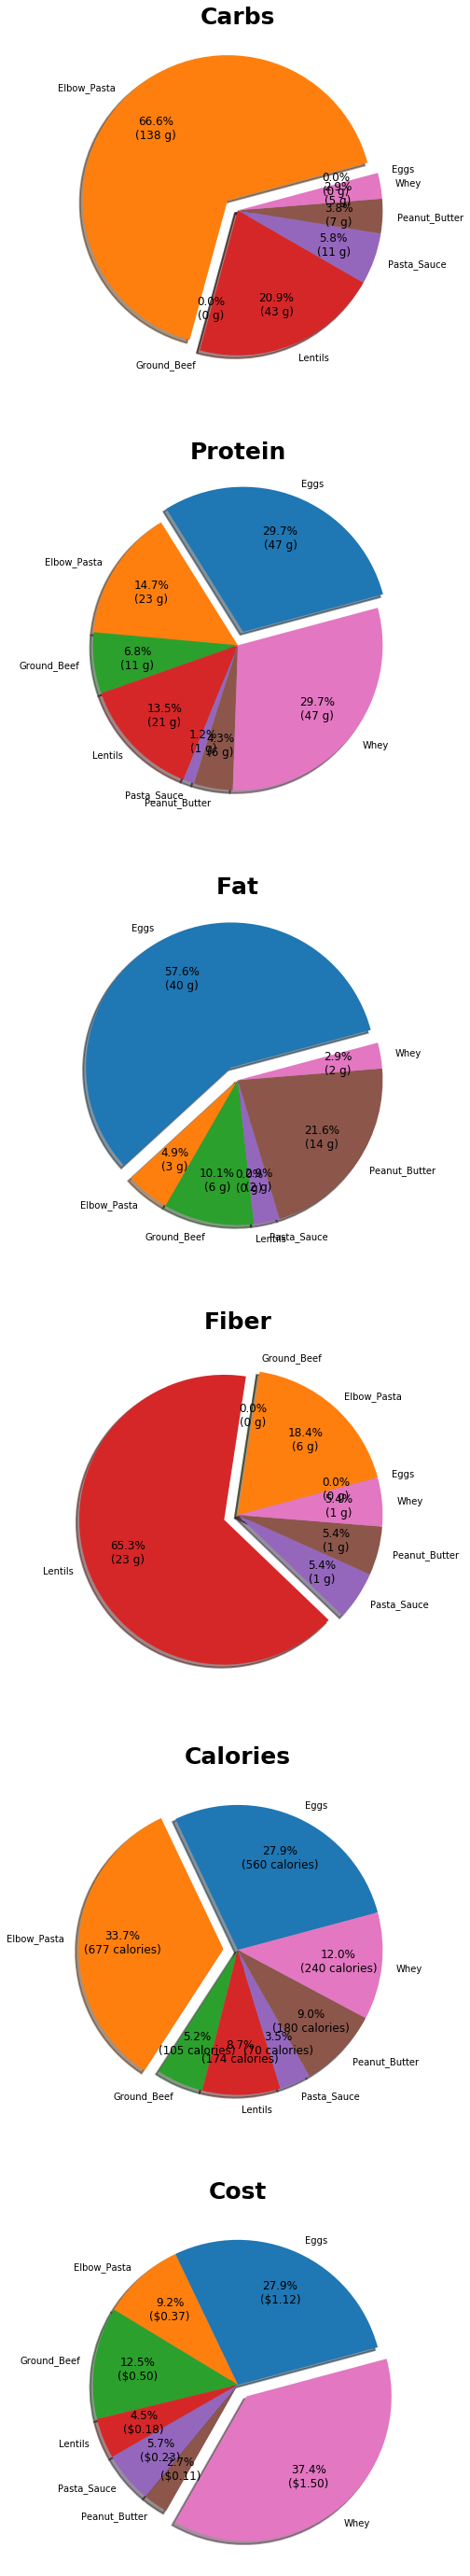

In [100]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

def func1(pct, allvals):
    absolute = pct/100.*np.sum(allvals)
    return "{:.1f}%\n(${:.2f})".format(pct, absolute)

def func2(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} calories)".format(pct, absolute)

def doColors(autotexts):
    for autotexts in autotexts:
        autotexts.set_color('black')
        #autotexts.size=15
        #autotexts.weight='bold'


explodeVal=0.1
autoWeightVal='normal'
labelVal='black'
autoTxtVal=12
titleVal=25
titleWeightVal='bold'
titleColor='black'
startAngleVal=15
        
print('\n\n')
pp.subplot(6,1,1)
pp.rcParams['text.color'] = labelVal
pp.title("Carbs",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(carbsData).index(np.max(carbsData))] = explodeVal
_,_,autotexts=pp.pie(carbsData,explode=explode,labels=namesData, autopct=lambda pct: func(pct, carbsData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

pp.subplot(6,1,2) 
pp.rcParams['text.color'] = labelVal
pp.title("Protein",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(proteinData).index(np.max(proteinData))] = explodeVal
_,_,autotexts=pp.pie(proteinData,explode=explode,labels=namesData, autopct=lambda pct: func(pct, proteinData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)
 
pp.subplot(6,1,3) 
pp.rcParams['text.color'] = labelVal 
pp.title("Fat",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(fatData).index(np.max(fatData))] = explodeVal
_,_,autotexts=pp.pie(fatData,explode=explode,labels=namesData, autopct=lambda pct: func(pct, fatData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

pp.subplot(6,1,4) 
pp.rcParams['text.color'] = labelVal 
pp.title("Fiber",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(fiberData).index(np.max(fiberData))] = explodeVal
_,_,autotexts=pp.pie(fiberData,explode=explode,labels=namesData, autopct=lambda pct: func(pct, fiberData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

pp.subplot(6,1,5) 
pp.rcParams['text.color'] = labelVal
pp.title("Calories",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(calData).index(np.max(calData))] = explodeVal
_,_,autotexts=pp.pie(calData,explode=explode,labels=namesData, autopct=lambda pct: func2(pct, calData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

pp.subplot(6,1,6)
pp.rcParams['text.color'] = labelVal
pp.title("Cost",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(costData).index(np.max(costData))] = explodeVal
_,_,autotexts=pp.pie(costData,explode=explode,labels=namesData, autopct=lambda pct: func1(pct, costData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

fig=pp.gcf()
fig.set_size_inches(50,50)

pp.show()